# ICA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def g(x):
    res = 1. / (1. + np.exp(-1. * x))
    return res


def ICA(X, n_iter=100, alpha=0.1):
    
    np.random.seed(0)
    
    m, n = X.shape
    #W = np.random.rand(n,n) - 0.5
    W = np.identity(n)
    mean = np.mean(X, axis=0)
    X_norm = X - mean
    X_norm /= np.std(X, axis=0)
    idx = np.random.permutation(range(m))
    for it in range (n_iter):
        for i in idx:
            W = W + alpha * ((1. - 2. * g(W.dot(X_norm[i].reshape((n,1))))).dot(X_norm[i].reshape((1,n))) + np.linalg.pinv(W.T))
            '''
            W = W + \
            alpha * \
            (np.identity(n) + \
             (1. - 2. * g(W.dot(X_norm[i].reshape((n,1))))).dot(
                    (W.dot(X_norm[i].reshape((n,1)))).T)).dot(W)
            '''
        
    return W, mean
        

In [3]:
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

In [4]:
from sklearn.decomposition import FastICA

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
#assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

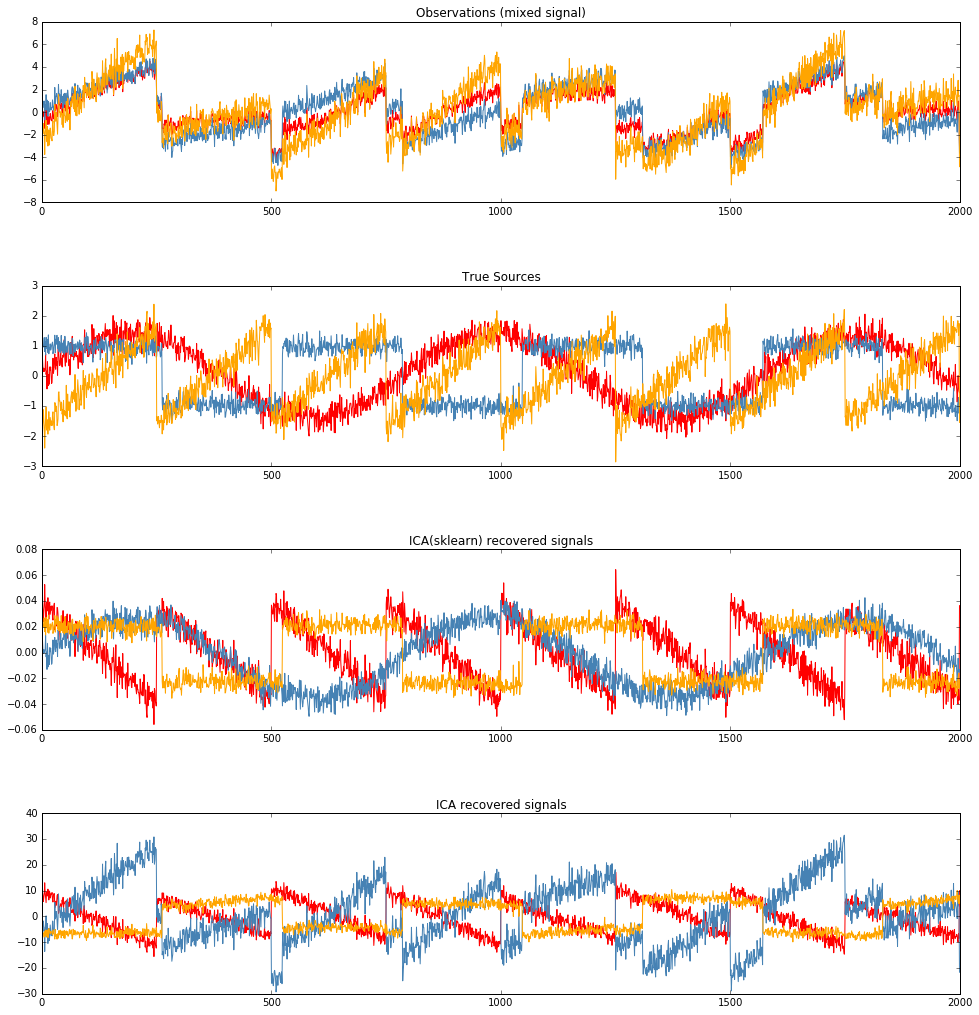

In [5]:
n_iter = 10000
alpha = 0.01

W, mean = ICA(X, n_iter, alpha)
S_rec = X.dot(W)

models = [X, S, S_, S_rec]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA(sklearn) recovered signals',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange']
plt.figure(figsize=(15,15))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()


Тут таки достаточно отчетливо выделились ступенчатый сигнал и "пила".

Результат достаточно отличался для разных начальных инициализаций W.

Для случайной инициализации при больших значениях альфа или количества итераций модуль W сильно возрастал.

При использованиии другой формулы для градиентного шага (из http://bsrc.kaist.ac.kr/nip-lr/V11N11/V11N11P1-225-246.pdf , с.9) модуль матрицы оставался в разумных пределах, но визуально результаты не выглядели лучше.

Возможно, необходима дополнительная предобработка сигнала (кроме нормализации) либо стоило реализовывать fastICA.